<a href="https://colab.research.google.com/github/tallywiesenberg/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Wiesenberg_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this
from sklearn.metrics import accuracy_score

df1 = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [68]:
df = df1.drop(['diagnosis', 'Unnamed: 32'], axis=1)
print(df.shape)
df.head()

(569, 31)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

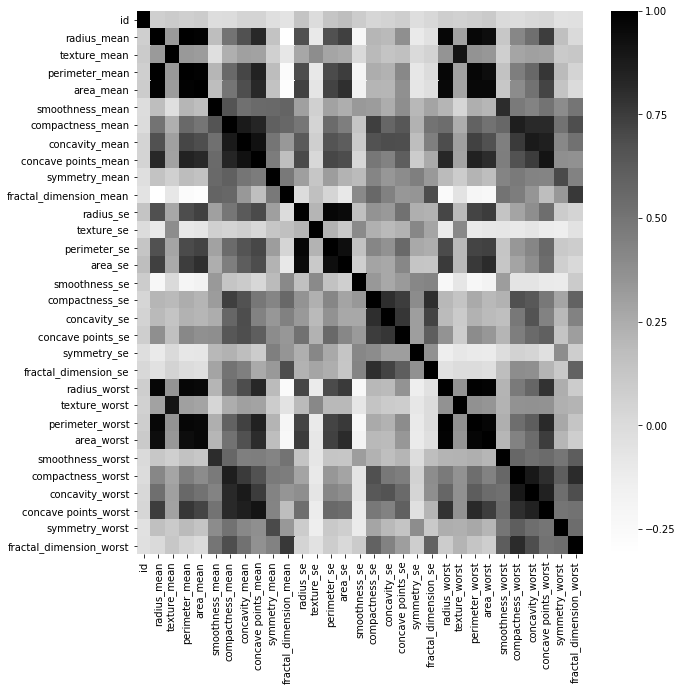

In [69]:
## Data Exploration

#missing values
df.isna().sum()
#correlation chart
corr = df.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Greys')
#interesting that there are noticable clusters of correlation in the correlation heatmap

In [0]:
## PCA

#fit standard scale (mean and std adjusted) to data
scaler = StandardScaler().fit(df)
#transform data
scaled_df = scaler.transform(df)


In [71]:
#fit pca
pca = PCA(15).fit(scaled_df);

#print eigenvectors/values
eigenvectors = pca.components_ #eigenvectors
print(f'Eigenvectors: \n {eigenvectors}')
eigenvalues  = pca.explained_variance_ratio_ #normalized eigenvectors
print(f'Eigenvalues:  \n {np.around(eigenvalues, decimals=2)}')
#transform data to pca in order to extract eigenvectors and values
B = pca.transform(scaled_df)

Eigenvectors: 
 [[ 2.29121629e-02  2.18913018e-01  1.03843884e-01  2.27534912e-01
   2.21045775e-01  1.42414707e-01  2.39067299e-01  2.58280254e-01
   2.60738114e-01  1.37977741e-01  6.41477914e-02  2.06117467e-01
   1.74133924e-02  2.11446519e-01  2.03076420e-01  1.46782103e-02
   1.70288397e-01  1.53543673e-01  1.83406751e-01  4.24155186e-02
   1.02496073e-01  2.28009352e-01  1.04515447e-01  2.36637339e-01
   2.24932135e-01  1.27824406e-01  2.09884561e-01  2.28602175e-01
   2.50746203e-01  1.22679932e-01  1.31560243e-01]
 [-3.40684907e-02 -2.33271401e-01 -6.00441986e-02 -2.14589002e-01
  -2.30668816e-01  1.86422211e-01  1.52454726e-01  6.05416253e-02
  -3.41673916e-02  1.90684979e-01  3.66531055e-01 -1.05935702e-01
   8.95477887e-02 -8.98070428e-02 -1.52771289e-01  2.03189876e-01
   2.32503362e-01  1.96846081e-01  1.29965181e-01  1.83558627e-01
   2.79584139e-01 -2.19296044e-01 -4.55012225e-02 -1.99295985e-01
  -2.18985461e-01  1.72562959e-01  1.44253637e-01  9.85265243e-02
  -7.5343

In [72]:
B.shape

(569, 15)

Text(0, 0.5, 'PCA 2')

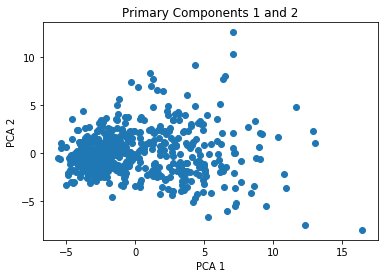

In [73]:
#plot first two primary components
plt.scatter(B[:, 0], B[:, 1])
plt.title('Primary Components 1 and 2')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Text(0, 0.5, 'Explained Variance Ratio')

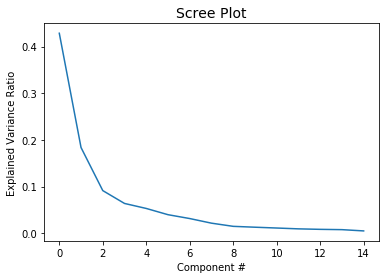

In [74]:
#Scree Plot
plt.plot(range(len(eigenvalues)), eigenvalues)
plt.title('Scree Plot', fontsize=14)
plt.xlabel('Component #')
plt.ylabel('Explained Variance Ratio')

In [0]:
## Clustering, find ideal number of clusters
def k_means_error(df, k_min, k_max):
  '''returns list of accuracies of k means cluster models using sum of squared distances error measurement
     includes creation and application of k-means model
     includes plot of accuracies over number of clusters intended for elbow method analysis'''
  errors = []                   #measure of error per number of clusters using sum of squared distances
  K = range(k_min, k_max)       #range of num of clusters
  #loop through num of clusters, find sum with least error
  for k in K:
    #create cluster model
    kmeans = KMeans(n_clusters=k)
    #fit model to transformed data
    kmeans = kmeans.fit(df)
    #append measure of error to list
    errors.append(kmeans.inertia_)
  plt.plot(K, errors)
  plt.title('Elbow Method Scree Plot', fontsize=14)
  plt.xlabel('Number of Clusters in Model')
  plt.ylabel('Error: Sum of Squared Distances')
  return errors


[17355.38249008864,
 11879.903145225151,
 10345.914153191232,
 9545.905714081146,
 8841.382502859933,
 8405.020823668496,
 7820.9997597201,
 7420.831237214524,
 7148.0170417041945,
 6964.333896362206,
 6695.265763115589,
 6447.050734471623,
 6224.35788489178,
 6103.700097667116]

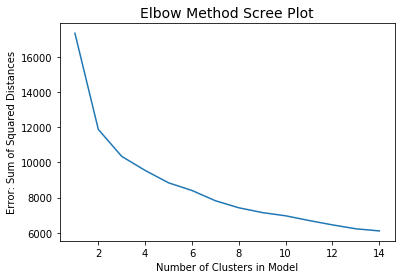

In [76]:
k_means_error(B, 1, 15)

In [81]:
#create cluster model
kmeans = KMeans(n_clusters=3)
#fit model to transformed data
kmeans = kmeans.fit(B)

#appending clusters to dataframe
labels = kmeans.labels_  #these are the model's labels
predicted_labels = pd.Series(labels) #made into a pandas series
df['clusters'] = predicted_labels.values #append to df
df.head()

0.0


In [0]:
#create cluster model
kmeans = KMeans(n_clusters=4)


# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.